<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-125/blob/main/Actividad_Semanal_4_EA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Semanal - 4

Estefania Abigail Castro Belmont A01332636

Vladimir Salazar Altamirano A01793118

Ciencia y analítica de datos

Jobish

11/10/2022

#Descripción del entendimiento de los 3 puntos indicados en la parte 1

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

##Parte 1: Ejercicio guiado

Como la última ocasión ya habíamos realizado preprocesamiento de la base de datos tomamos el archivo limpio, donde hicimos ya algunas eliminaciones y completamos los datos faltantes para no repetir el código que ya se había empleado en el ejercicio anterior


In [1]:
#importamos librerías
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#Leemos el archivo csv
path="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-125/main/datoslimpios_default_of_credit_card_clients.csv"
df = pd.read_csv(path, index_col = 0)

In [3]:
#Pasamos a DataFrame
df = pd.DataFrame(df)

In [4]:
#Aquí desplegamos el dataframe con las primeras cinco filas para visualizar datos.
#Se observa que la última columna es la "Y".
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,...,29991.000000,29991.000000,29991.000000,29991.000000,2.999100e+04,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000
mean,14998.005835,167494.237605,1.603881,1.853056,1.551966,35.483278,-0.016738,-0.133740,-0.166583,-0.220800,...,43270.806142,40318.567537,38880.274116,5663.081825,5.922510e+03,5225.742189,4826.910406,4800.092128,5216.906539,0.221166
std,8658.972099,129739.162507,0.489098,0.790351,0.521967,9.217832,1.123688,1.197148,1.195883,1.169067,...,64339.975191,60802.956263,59560.497716,16564.424518,2.304417e+04,17608.704177,15668.264754,15280.352834,17779.941169,0.415039
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.500000,1766.500000,1256.500000,1000.000000,8.355000e+02,390.000000,296.500000,252.000000,118.000000,0.000000
50%,14998.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17080.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22495.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54544.500000,50196.000000,49207.500000,5006.000000,5.000000e+03,4506.000000,4013.500000,4032.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#Vemos las filas y columnas del df
df.shape

(29991, 25)

###Quitamos los datos que nos estorbarían en el ejercicio

In [6]:
#Copiamos los datos originales para no transofrmarlos
ndf= df.copy()

In [7]:
#Vemos las columnas que conforman el df
ndf.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
##Eliminamos las dos columnas que tienen doble índice y la columna target
ndf = ndf.drop(columns = ['ID', 'Y'])

In [9]:
#Vemos las filas y columnas del df final
ndf.shape

(29991, 23)

###Paso 1 
Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

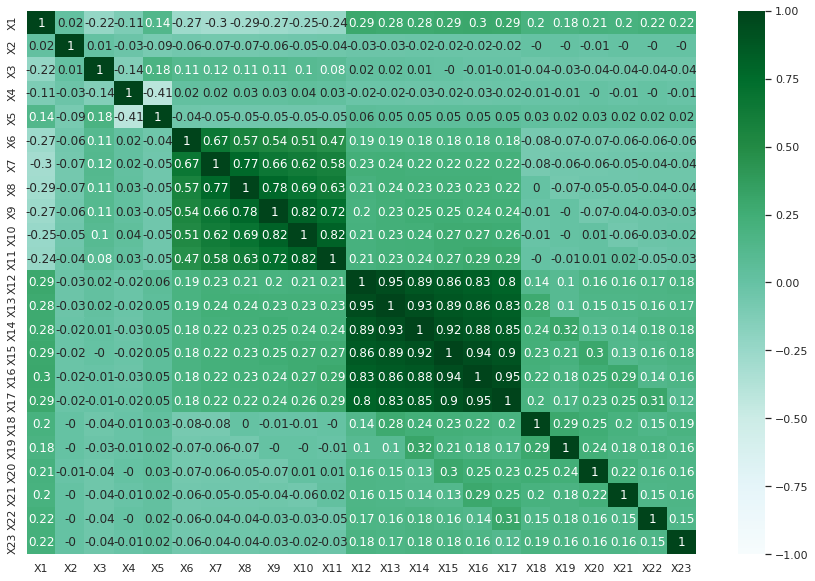

In [10]:
#Vemos la matriz de correlación para ver el comportamiento de las variables
import seaborn as singular_values_
correlacion = ndf.corr().round(2)

sns.set(rc= {"figure.figsize":(15,10)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "BuGn", annot = True)

In [11]:
#Reescalamos el ndf para que los datos queden normalizados
scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)
#Son muchos valores. Así que imprimamos los primeros 5 resultados mejor.
scaled[:5]
scaled_df = pd.DataFrame(scaled, columns=ndf.columns)
scaled_df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136871,0.809910,0.185926,-1.057490,-1.245789,1.794780,1.782383,-0.696917,-0.666526,-1.530039,...,-0.668045,-0.672545,-0.663113,-0.652797,-0.341888,-0.227112,-0.296775,-0.308074,-0.314140,-0.293420
1,-0.366081,0.809910,0.185926,0.858372,-1.028814,-0.875046,1.782383,0.139300,0.188871,0.235065,...,-0.639309,-0.621689,-0.606289,-0.598045,-0.341888,-0.213615,-0.239984,-0.244250,-0.314140,-0.180932
2,-0.597318,0.809910,0.185926,0.858372,-0.160917,0.014896,0.111717,0.139300,0.188871,0.235065,...,-0.482480,-0.449803,-0.417266,-0.391730,-0.250244,-0.191918,-0.239984,-0.244250,-0.248696,-0.012200
3,-0.905634,0.809910,0.185926,-1.057490,0.164545,0.014896,0.111717,0.139300,0.188871,0.235065,...,0.032719,-0.232469,-0.186829,-0.156705,-0.221145,-0.169395,-0.228626,-0.237868,-0.244180,-0.237176
4,-0.905634,-1.234704,0.185926,-1.057490,2.334289,-0.875046,0.111717,-0.696917,0.188871,0.235065,...,-0.161295,-0.347081,-0.348222,-0.331589,-0.221145,1.334784,0.271135,0.266345,-0.269049,-0.255230


In [12]:
#HAcemos el fit a PCA
from sklearn import preprocessing
pcs = PCA()
pcs.fit(preprocessing.scale(ndf))

PCA()

In [13]:
#Vemos el resumen de desviación estándar, proporción de varianza y la proporción acumulada 
summary = {'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
pcsSummary = pd.DataFrame(summary).transpose()
pcsSummary = pcsSummary.round(2)
pcsSummary

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Standard deviation,2.56,2.02,1.25,1.21,1.01,0.98,0.95,0.94,0.93,0.88,...,0.72,0.64,0.51,0.50,0.43,0.36,0.26,0.2,0.16,0.15
Proportion of variance,0.28,0.18,0.07,0.06,0.04,0.04,0.04,0.04,0.04,0.03,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00
Cumulative proportion,0.28,0.46,0.53,0.59,0.64,0.68,0.72,0.76,0.80,0.83,...,0.94,0.96,0.97,0.98,0.99,0.99,1.00,1.0,1.00,1.00


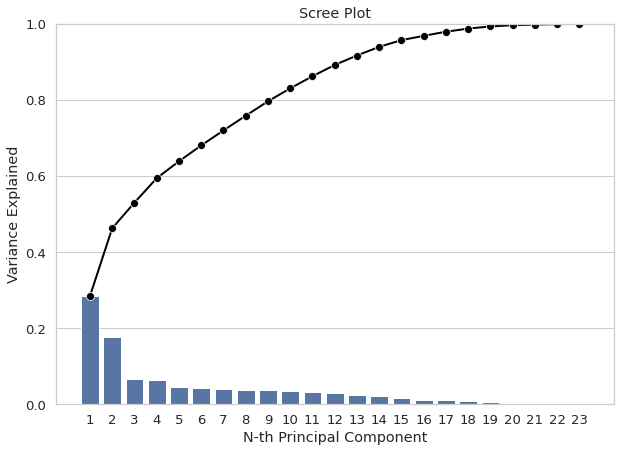

In [14]:
#Graficamos el resumen para ver cómo se comportan los datos
PC_components = np.arange(pcs.n_components_) + 1
cusm = np.cumsum(pcs.explained_variance_ratio_)
vartio = pcs.explained_variance_ratio_

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [15]:
#Vemos los componentes por variable para conocer su conformación
pcsSummary.columns = ["PC{}".format(i) for i in range(1,len(pcsSummary.columns)+1)]
pcsSummary.columns

pcsCompsDF = pd.DataFrame(pcs.components_.transpose(),
                          columns = pcsSummary.columns,
                          index = ndf.columns )
pcsCompsDF.iloc[:,:13]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.068568,0.316376,0.017516,0.069755,-0.148852,-0.375796,0.105891,-0.059377,0.021608,0.017463,0.008586,-0.098652,0.358798
X2,-0.021701,0.030533,0.023721,-0.077583,0.884672,-0.394182,0.063957,-0.027472,0.018656,0.024381,-0.008939,0.056548,0.176266
X3,0.019222,-0.091605,-0.316035,0.247174,0.363600,0.566103,-0.399647,0.080913,-0.154996,0.062528,0.001120,-0.184836,0.084510
X4,-0.005636,-0.043278,0.452720,-0.445072,-0.053517,0.279753,-0.159598,0.026305,-0.055952,0.038576,-0.010631,-0.141370,0.667109
X5,0.014242,0.066618,-0.461987,0.463101,-0.164183,-0.088848,0.081466,-0.012845,0.046848,0.008067,-0.021181,-0.047735,0.577659
X6,0.161073,-0.298166,-0.017417,0.016096,-0.035031,-0.039954,-0.086547,0.021485,-0.030394,0.003288,0.045219,0.623360,0.156028
X7,0.194097,-0.334893,0.017865,0.049975,-0.037481,-0.061053,-0.092022,0.015676,-0.033347,0.006545,0.028437,0.376378,0.080930
X8,0.200222,-0.343790,0.061608,0.083931,-0.023413,-0.069887,-0.021371,-0.026402,-0.011515,-0.024857,-0.106648,0.101271,0.051533
X9,0.207030,-0.344581,0.089045,0.109310,-0.007549,-0.087350,0.039362,-0.056225,0.044363,-0.056841,-0.007258,-0.211794,0.018128
X10,0.210878,-0.331616,0.108883,0.115508,0.002004,-0.087041,0.103911,-0.034001,0.054442,0.066777,0.010196,-0.358829,-0.023140


In [16]:
#Vemos el porcentaje acumulado al tener 13 componentes
pcsSummary.iloc[2,12]

0.92

In [17]:
#Vemos la varianza explicada y la acumulada de cada componente
pcsSummary_df = pd.DataFrame({'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100})
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df


,% varianza explicada,% varianza acumulada
PC1,28.45,28.448163
PC2,17.82,46.264613
PC3,6.74,53.008288
PC4,6.40,59.407987
PC5,4.46,63.865802
PC6,4.16,68.027528
PC7,3.95,71.973778
PC8,3.86,75.832980
PC9,3.79,79.620977
PC10,3.40,83.024937


###Respuesta
Decidimos usar 13 componentes, ya que con ello alcanzamos una variabilidad un poco superior al 90%, el cual se suele. Tal como podemos ver en la gráfica del Scree Plot y en el DF pcsSummary, en el tercer renglon, proporcion acumulada. 

###Paso 2
Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [18]:
#Volvemos a visualizar en un dataframe los componentes y variables 
pcsSummary.columns = ["PC{}".format(i) for i in range(1,len(pcsSummary.columns)+1)]
pcsSummary.columns

pcsCompsDF = pd.DataFrame(pcs.components_.transpose(),
                          columns = pcsSummary.columns,
                          index = ndf.columns )
pcsCompsDF.iloc[:,:13].round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.0686,0.3164,0.0175,0.0698,-0.1489,-0.3758,0.1059,-0.0594,0.0216,0.0175,0.0086,-0.0987,0.3588
X2,-0.0217,0.0305,0.0237,-0.0776,0.8847,-0.3942,0.0640,-0.0275,0.0187,0.0244,-0.0089,0.0565,0.1763
X3,0.0192,-0.0916,-0.3160,0.2472,0.3636,0.5661,-0.3996,0.0809,-0.1550,0.0625,0.0011,-0.1848,0.0845
X4,-0.0056,-0.0433,0.4527,-0.4451,-0.0535,0.2798,-0.1596,0.0263,-0.0560,0.0386,-0.0106,-0.1414,0.6671
X5,0.0142,0.0666,-0.4620,0.4631,-0.1642,-0.0888,0.0815,-0.0128,0.0468,0.0081,-0.0212,-0.0477,0.5777
X6,0.1611,-0.2982,-0.0174,0.0161,-0.0350,-0.0400,-0.0865,0.0215,-0.0304,0.0033,0.0452,0.6234,0.1560
X7,0.1941,-0.3349,0.0179,0.0500,-0.0375,-0.0611,-0.0920,0.0157,-0.0333,0.0065,0.0284,0.3764,0.0809
X8,0.2002,-0.3438,0.0616,0.0839,-0.0234,-0.0699,-0.0214,-0.0264,-0.0115,-0.0249,-0.1066,0.1013,0.0515
X9,0.2070,-0.3446,0.0890,0.1093,-0.0075,-0.0874,0.0394,-0.0562,0.0444,-0.0568,-0.0073,-0.2118,0.0181
X10,0.2109,-0.3316,0.1089,0.1155,0.0020,-0.0870,0.1039,-0.0340,0.0544,0.0668,0.0102,-0.3588,-0.0231


In [19]:
#Buscamos la varianza total de todas las variables
total_var = df.var().sum()

In [20]:
#Calculamos la varianza para cada variable que estamos estudiando
var_x1 = df.X1.var()
var_x2 = df.X2.var()
var_x3 = df.X3.var()
var_x4 = df.X4.var()
var_x5 = df.X5.var()
var_x6 = df.X6.var()
var_x7 = df.X7.var()
var_x8 = df.X8.var()
var_x9 = df.X9.var()
var_x10 = df.X10.var()
var_x11 = df.X11.var()
var_x12 = df.X12.var()
var_x13 = df.X13.var()
var_x14 = df.X14.var()
var_x15 = df.X15.var()
var_x16 = df.X16.var()
var_x17 = df.X17.var()
var_x18 = df.X18.var()
var_x19 = df.X19.var()
var_x20 = df.X20.var()
var_x21 = df.X21.var()
var_x22 = df.X22.var()
var_x23 = df.X23.var()
var_Y = df.Y.var()

In [21]:
#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t:',total_var.round(2) )
print('Varianza X1 \t:', ((var_x1/total_var)*100).round(2),'%' )
print('Varianza X2 \t:', ((var_x2/total_var)*100).round(2),'%' )
print('Varianza X3 \t:', ((var_x3/total_var)*100).round(2),'%' )
print('Varianza X4 \t:', ((var_x4/total_var)*100).round(2),'%' )
print('Varianza X5 \t:', ((var_x5/total_var)*100).round(2),'%' )
print('Varianza X6 \t:', ((var_x6/total_var)*100).round(2),'%' )
print('Varianza X7 \t:', ((var_x7/total_var)*100).round(2),'%' )
print('Varianza X8 \t:', ((var_x8/total_var)*100).round(2),'%' )
print('Varianza X9 \t:', ((var_x9/total_var)*100).round(2),'%' )
print('Varianza X10 \t:',((var_x10/total_var)*100).round(2),'%' )
print('Varianza X11 \t:', ((var_x11/total_var)*100).round(2),'%' )
print('Varianza X12 \t:', ((var_x12/total_var)*100).round(2),'%' )
print('Varianza X13 \t:', ((var_x13/total_var)*100).round(2),'%' )
print('Varianza X14 \t:', ((var_x14/total_var)*100).round(2),'%' )
print('Varianza X15 \t:', ((var_x15/total_var)*100).round(2),'%' )
print('Varianza X16 \t:', ((var_x16/total_var)*100).round(2),'%' )
print('Varianza X17 \t:', ((var_x17/total_var)*100).round(2),'%' )
print('Varianza X18 \t:', ((var_x18/total_var)*100).round(2),'%' )
print('Varianza X19 \t:', ((var_x19/total_var)*100).round(2),'%' )
print('Varianza X20 \t:',((var_x20/total_var)*100).round(2),'%' )
print('Varianza X21 \t:', ((var_x21/total_var)*100).round(2),'%' )
print('Varianza X22 \t:', ((var_x22/total_var)*100).round(2),'%' )
print('Varianza X23 \t:', ((var_x23/total_var)*100).round(2),'%' )
print('Varianza Y \t:', ((var_Y/total_var)*100).round(2),'%' )

Varianza Total 	: 45502437690.35
Varianza X1 	: 36.99 %
Varianza X2 	: 0.0 %
Varianza X3 	: 0.0 %
Varianza X4 	: 0.0 %
Varianza X5 	: 0.0 %
Varianza X6 	: 0.0 %
Varianza X7 	: 0.0 %
Varianza X8 	: 0.0 %
Varianza X9 	: 0.0 %
Varianza X10 	: 0.0 %
Varianza X11 	: 0.0 %
Varianza X12 	: 11.92 %
Varianza X13 	: 11.14 %
Varianza X14 	: 10.57 %
Varianza X15 	: 9.1 %
Varianza X16 	: 8.12 %
Varianza X17 	: 7.8 %
Varianza X18 	: 0.6 %
Varianza X19 	: 1.17 %
Varianza X20 	: 0.68 %
Varianza X21 	: 0.54 %
Varianza X22 	: 0.51 %
Varianza X23 	: 0.69 %
Varianza Y 	: 0.0 %


In [22]:
total_var =scaled_df.var().sum()
pd.DataFrame({"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
              "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})


,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.347826,4.347826
X2,4.347826,8.695652
X3,4.347826,13.043478
X4,4.347826,17.391304
X5,4.347826,21.739130
X6,4.347826,26.086957
X7,4.347826,30.434783
X8,4.347826,34.782609
X9,4.347826,39.130435
X10,4.347826,43.478261


In [23]:
pcsCompsDF.PC1.abs().nlargest(3)

X15    0.353898
X16    0.351755
X14    0.349792
Name: PC1, dtype: float64

In [24]:
pcsCompsDF.PC2.abs().nlargest(3)

X9    0.344581
X8    0.343790
X7    0.334893
Name: PC2, dtype: float64

In [25]:
pcsCompsDF.iloc[:,:14].abs().idxmax()


PC1     X15
PC2      X9
PC3      X5
PC4      X5
PC5      X2
PC6      X3
PC7     X22
PC8     X21
PC9     X23
PC10    X20
PC11    X18
PC12     X6
PC13     X4
PC14     X1
dtype: object

###Respuesta

In [26]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=14)
 
pca_features = pca.fit_transform(ndf)
 
print('Shape before PCA: ', ndf.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12', 'PC13','PC14'])

Shape before PCA:  (29991, 23)
Shape after PCA:  (29991, 14)


In [27]:
pca_df["Target"] = df.Y
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Target
0,-166500.949372,-75560.095231,-473.752136,-135.647831,355.871182,-24.366021,-860.128218,79.421640,189.941675,713.669283,448.792560,832.115017,-126.254108,-9.900841,1.0
1,-114251.970295,9766.121902,2734.706043,-1566.405291,-4052.270329,693.678858,-1514.558615,1261.714642,-625.653378,482.645380,1053.053707,-7.128059,453.012909,-8.954859,1.0
2,-98451.176544,-33483.525875,-2678.995544,-5100.806098,3360.524801,174.142770,-6984.819569,1613.602089,-2284.450083,4598.881470,-3123.418252,-2915.221632,396.953611,-0.667097,0.0
3,-71240.556455,-95232.427887,-10048.032125,4424.311274,-640.404283,6191.977908,2367.796258,838.585279,548.014643,-1817.358618,5513.947010,-3641.065035,-1410.266625,2.600726,0.0
4,-114848.323344,-68743.314753,24607.019790,34257.495480,8198.435887,4663.329699,-11838.177935,2726.947236,7677.177012,-627.153927,4062.199150,223.464166,2645.899837,22.798929,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,200003.770862,-55432.577791,-141615.822408,76690.901035,-15157.841126,10255.547995,5656.079007,-6321.620856,10493.825198,-35410.114568,15952.571359,-13435.333393,-866.139665,1.950864,0.0
29987,-97747.172475,35076.819503,4754.842557,1717.048697,-5994.506628,-6768.019022,-3217.933474,-1923.071395,3651.388216,-1206.268630,1802.082645,-180.658209,-1607.347422,7.735823,0.0
29988,-140218.673015,-77876.065008,26241.718261,-7150.426566,5728.444185,-16149.089280,-5597.615312,-4586.960246,1274.147212,-3688.984167,6140.744136,-1981.405809,-1303.411424,3.008812,0.0
29989,-41439.984544,-74911.999149,17727.408725,44989.243999,8423.471909,1071.553906,92773.051178,-49409.416814,-10848.298752,-16243.178189,-26013.263775,-10726.228309,-1548.218101,6.682589,0.0


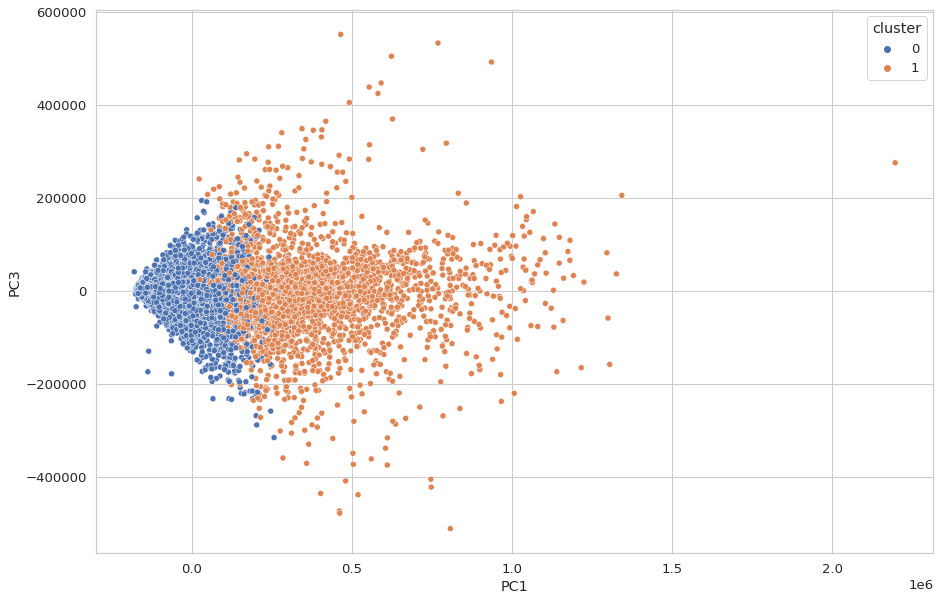

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(ndf)


kmeans =KMeans(n_clusters=2).fit(X)
pca_df['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC3",hue="cluster",data=pca_df)

###Paso 3
Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


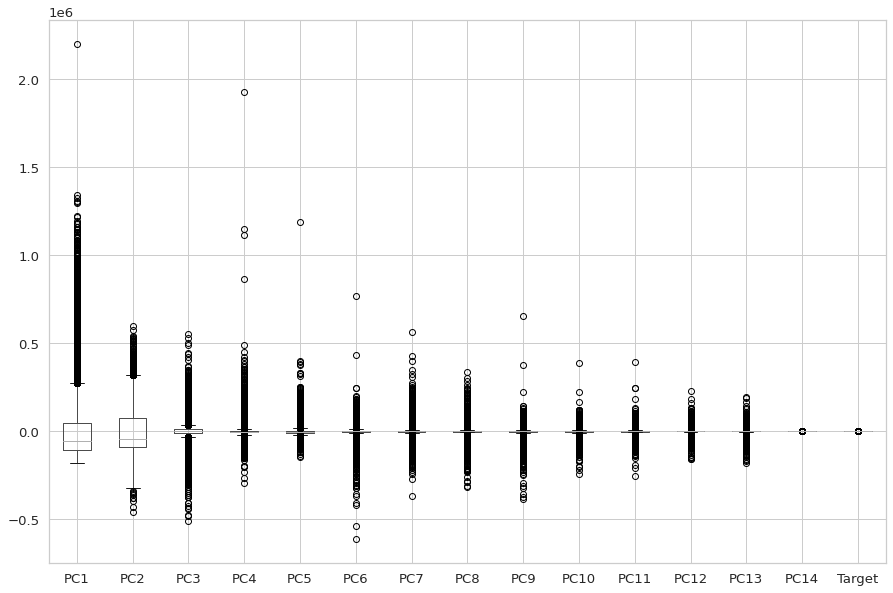

In [29]:
pca_df.boxplot()

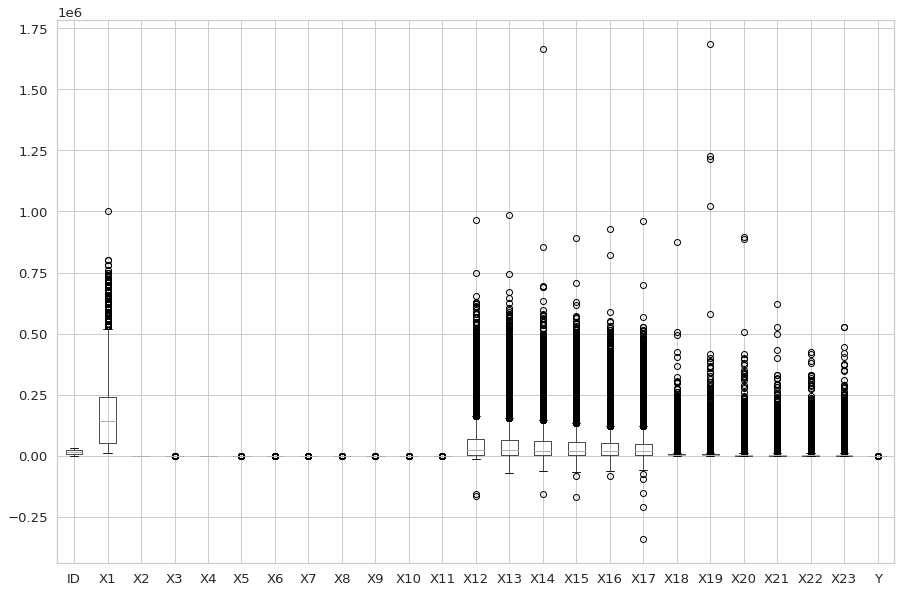

In [30]:
df.boxplot()

###Respuesta

In [31]:
#correlaciones= pca_df.transpose().corr().round(2)
#correlaciones= correlaciones.replace(1,0)
#correlaciones

In [32]:
#for c in correlaciones:
#    print("Mayor correlacion: ", np.abs(correlaciones[[c]]).idxmax(),"% de corr________________", np.abs(correlaciones[c]).max())

#Parte 2
Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?